In [1]:
Workingdirectory = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Homework"
setwd(Workingdirectory)
data = paste(Workingdirectory,'\\CaliforniaHospitalData.csv', sep ='')
df = read.csv(data,header =T,sep =',')

In [2]:
library(tree)
library(rpart)
library(rpart.plot)
library(Metrics)
library(psych)
library(fmsb)


In [3]:
#Explore Data

In [4]:
summary(df)
names(df)
summary(df)

   HospitalID                                                    Name   
 Min.   :10767   Alameda Hospital                                  : 1  
 1st Qu.:21053   Arrowhead Regional Medical Center                 : 1  
 Median :33251   Barstow Community Hospital                        : 1  
 Mean   :31828   Barton Memorial Hospital                          : 1  
 3rd Qu.:39102   Biggs-Gridley Memorial Hospital                   : 1  
 Max.   :46996   California Pacific Medical Center - Pacific Campus: 1  
                 (Other)                                           :55  
      Zip                             Website        TypeControl
 90033  : 1   www.sbch.org                : 2   City/County: 7  
 90048  : 1   coloradorivermedical.org    : 1   District   :14  
 90704  : 1   redbluff.mercy.org/index.htm: 1   Investor   : 3  
 90806  : 1   stanfordhospital.org        : 1   Non Profit :37  
 92028  : 1   www.alamedahospital.org     : 1                   
 92103  : 1   www.arrowhea

[1] "HospitalID"  "Name"        "Zip"         "Website"     "TypeControl"
 [6] "Teaching"    "DonorType"   "NoFTE"       "NetPatRev"   "InOperExp"  
[11] "OutOperExp"  "OperRev"     "OperInc"     "AvlBeds"

   HospitalID                                                    Name   
 Min.   :10767   Alameda Hospital                                  : 1  
 1st Qu.:21053   Arrowhead Regional Medical Center                 : 1  
 Median :33251   Barstow Community Hospital                        : 1  
 Mean   :31828   Barton Memorial Hospital                          : 1  
 3rd Qu.:39102   Biggs-Gridley Memorial Hospital                   : 1  
 Max.   :46996   California Pacific Medical Center - Pacific Campus: 1  
                 (Other)                                           :55  
      Zip                             Website        TypeControl
 90033  : 1   www.sbch.org                : 2   City/County: 7  
 90048  : 1   coloradorivermedical.org    : 1   District   :14  
 90704  : 1   redbluff.mercy.org/index.htm: 1   Investor   : 3  
 90806  : 1   stanfordhospital.org        : 1   Non Profit :37  
 92028  : 1   www.alamedahospital.org     : 1                   
 92103  : 1   www.arrowhea

In [5]:
#Varaibles relevant

In [6]:
attach(df)
dfnew =  data.frame(TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds)
dim(dfnew)


[1] 61 10

In [7]:
#Create train and test dataset

In [8]:
s = sample(61,40)
df_train = dfnew[s,]
df_test = dfnew[-s,]

In [9]:
#Using operating income as a target variable, create a tree (1 pt.)

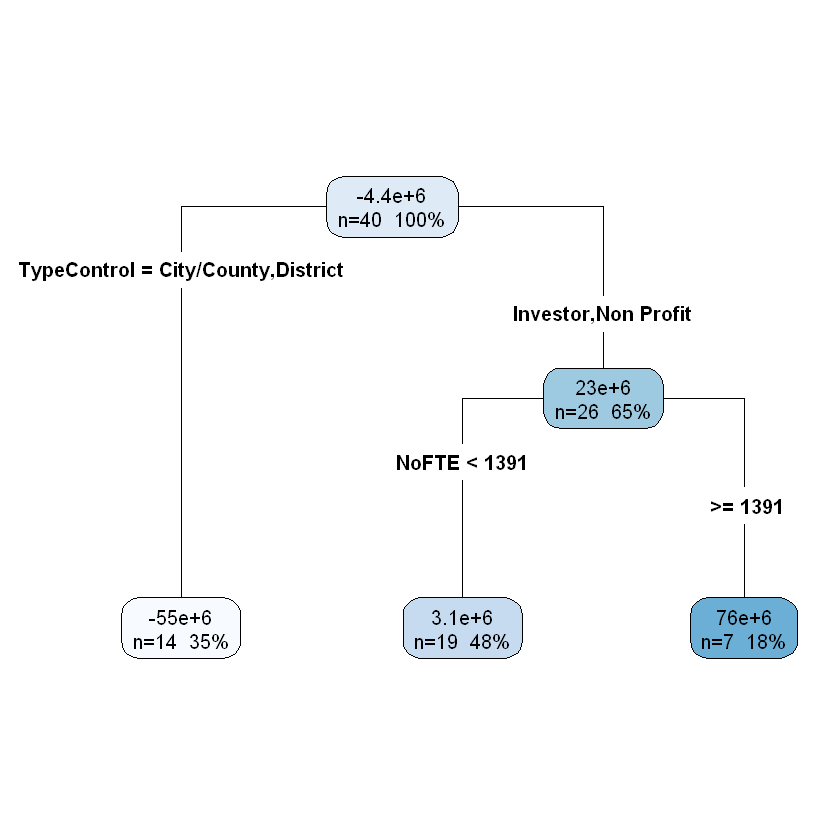

In [10]:
df_test_features = df_test[-c(9)]
df_test_targets = df_test[c(9)]
dtm = rpart(OperInc ~., df_train, method ="anova")
rpart.plot(dtm, type =4 , extra = 101)


In [11]:
# Operating income-compare predict and actual using compute the rood mean square error

In [12]:
prediction <- predict(dtm, df_test_features)
rmse(df_test_targets, prediction)

[1] 38349051

In [13]:
#Using operating revenue as a target variable, create a tree (1 pt.)

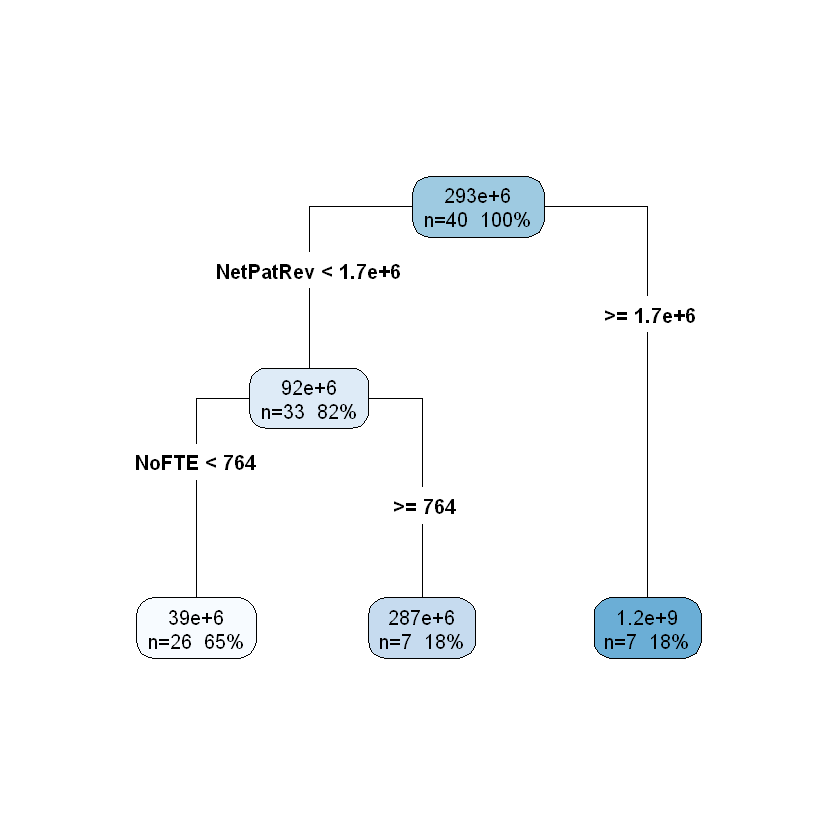

In [14]:
df_test_features = df_test[-c(8)]
df_test_targets = df_test[c(8)]
dtm = rpart( OperRev~., df_train, method ="anova")
rpart.plot(dtm, type =4 , extra = 101)


In [15]:
#operating revenue-resuts in predicted values close to the observed data values

In [16]:
prediction <- predict(dtm, df_test_features)
rmse(df_test_targets, prediction)

[1] 144990740

In [17]:
#Using TypeControl as a target variable, create a tree (1 pt.) 

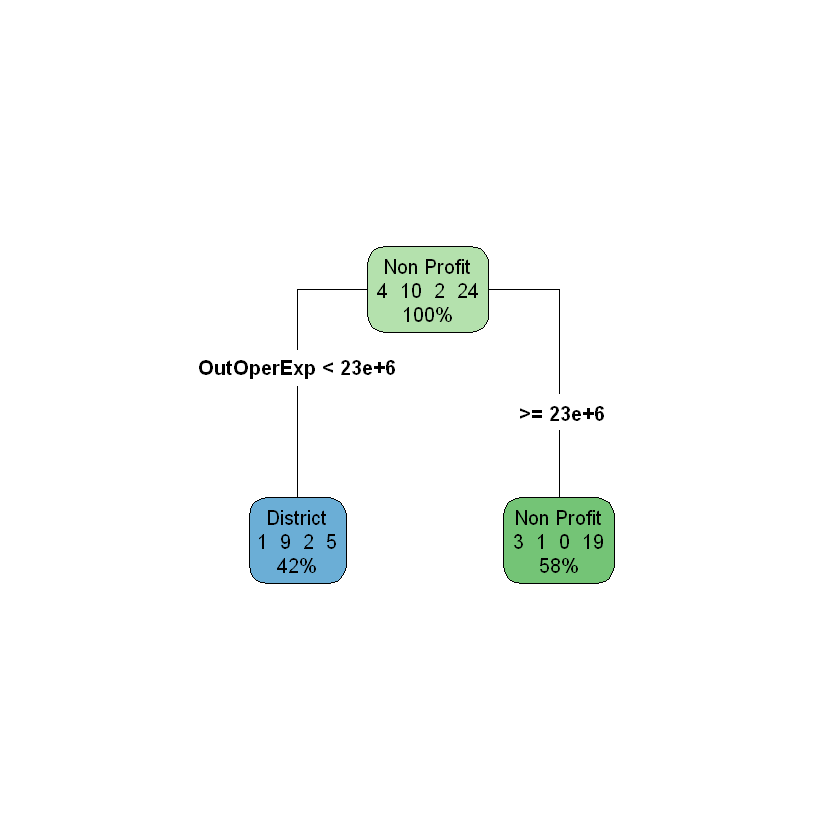

In [18]:
df_test_features = df_test[-c(1)]
df_test_targets = df_test[c(1)]
dtm = rpart( TypeControl~., df_train, method ="class")
rpart.plot(dtm, type =4 , extra = 101)


In [19]:
cohen.kappa(cbind(eval(parse(text=toString(df_test_targets))), as.numeric(prediction)))

Call: cohen.kappa1(x = x, w = w, n.obs = n.obs, alpha = alpha, levels = levels)

Cohen Kappa and Weighted Kappa correlation coefficients and confidence boundaries 
                  lower estimate upper
unweighted kappa  0.000        0 0.000
weighted kappa   -0.086        0 0.086

 Number of subjects = 21 

In [20]:
#Using DonorType as a target variable, create a tree (1 pt.) 

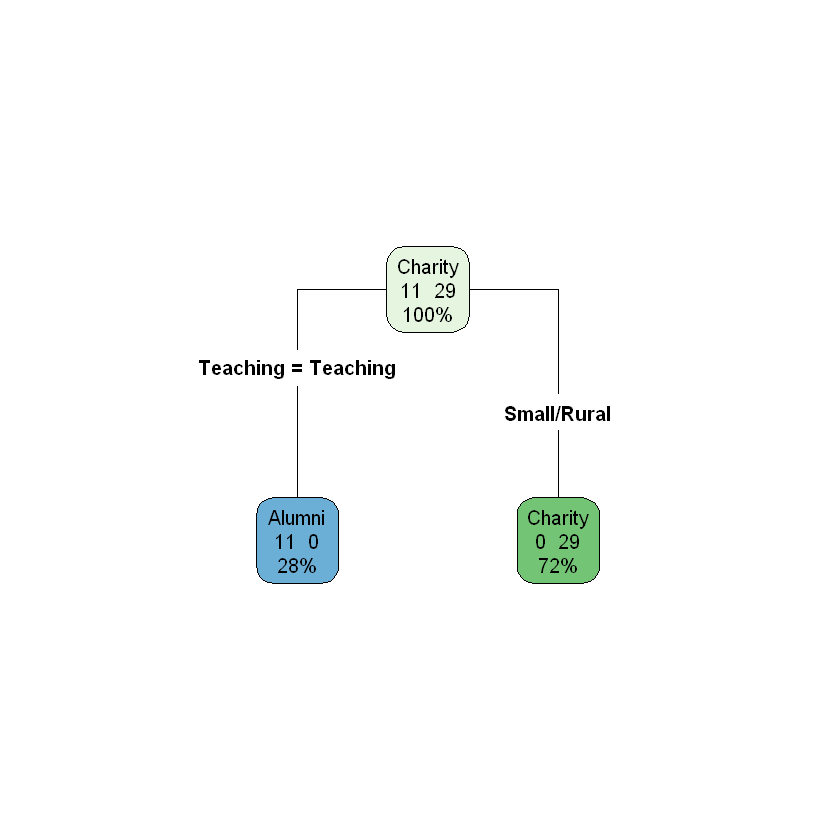

In [21]:
df_test_features = df_test[-c(3)]
df_test_targets = df_test[c(3)]
dtm = rpart(DonorType~., df_train, method = "class")
rpart.plot(dtm, type =4 , extra = 101)


In [22]:
cohen.kappa(cbind(eval(parse(text=toString(df_test_targets))), as.numeric(prediction)))

Call: cohen.kappa1(x = x, w = w, n.obs = n.obs, alpha = alpha, levels = levels)

Cohen Kappa and Weighted Kappa correlation coefficients and confidence boundaries 
                 lower estimate  upper
unweighted kappa  0.00     0.00  0.000
weighted kappa   -0.17    -0.12 -0.074

 Number of subjects = 21 